# Exercise: Analyzing Chinook Database

Preparation I've done:
 - Retrieve the dataset and load it
 - Load the %sql extension and point it at the database
 - Display the tables and an example query

Additional steps you might take:
 - Add libraries for visualization (matplotlib, seaborn, plotly)
 - Add libraries for statistics (numpy)
 - Explore the dataset using SQL and/or pandas

----

1. Retrieve a list of all the tracks in the database, displaying only the track name and the name of the album it belongs to. Limit the result to the first 5 rows.
   > Operations: `SELECT`
2. Find the total number of customers from each country. Display the country name and the corresponding count. Order the results by the count in descending order.
   > Operations: `SELECT`, `COUNT`, `GROUP BY`, `ORDER BY`
3. Identify the top 5 genres with the highest number of tracks. Display the genre name along with the total number of tracks for each genre.
   > Operations: `SELECT`, `COUNT`, `GROUP BY`, `ORDER BY`
4. Determine the average invoice total for each customer, considering both the album and individual track purchases. Display the customer's first and last name along with the average invoice total. Order the results by the average invoice total in descending order.
   > Operations: `SELECT`, `AVG`, `JOIN`, `GROUP BY`, `ORDER BY`
5. Identify the customer who spent the most on music purchases. Display the customer's first and last name, along with the total amount spent.
   > Operations: `SELECT`, `SUM`, `JOIN`, `GROUP BY`, `ORDER BY`, `LIMIT`

In [1]:
# Load chinook dataset and query it using SQL magic into pandas dataframes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import sqlite3
%load_ext sql

# Load data
conn = sqlite3.connect("chinook.sqlite")

# Tell %sql about the database
%sql sqlite:///chinook.sqlite

# List tables in database
query = "SELECT name FROM sqlite_master WHERE type='table';"

# Read data into a Pandas DataFrame
tables = %sql $query

# Print head
display(tables)

# Query to get the first 5 rows of the `albums` table
result = %sql SELECT * FROM albums LIMIT 5;

# Display query result, note that Pandas DataFrame is returned!
display(result)


 * sqlite:///chinook.sqlite
Done.


name
albums
sqlite_sequence
artists
customers
employees
genres
invoices
invoice_items
media_types
playlists


 * sqlite:///chinook.sqlite
Done.


AlbumId,Title,ArtistId
1,For Those About To Rock We Salute You,1
2,Balls to the Wall,2
3,Restless and Wild,2
4,Let There Be Rock,1
5,Big Ones,3


In [2]:
# Query to get the first 5 rows of the `tracks` table
result_tracks = %sql SELECT * FROM tracks LIMIT 5;

# Display query result, note that Pandas DataFrame is returned!
display(result_tracks)

 * sqlite:///chinook.sqlite
Done.


TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Hoffman",230619,3990994,0.99
4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. Dirkscneider & W. Hoffman",252051,4331779,0.99
5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


1. Retrieve a list of all the tracks in the database, displaying only the name of the album it belongs to. Limit the result to the first 5 rows.

In [3]:
%sql SELECT tracks.Name, albums.Title FROM tracks JOIN albums ON tracks.AlbumId = albums.AlbumId LIMIT 5

 * sqlite:///chinook.sqlite
Done.


Name,Title
For Those About To Rock (We Salute You),For Those About To Rock We Salute You
Put The Finger On You,For Those About To Rock We Salute You
Let's Get It Up,For Those About To Rock We Salute You
Inject The Venom,For Those About To Rock We Salute You
Snowballed,For Those About To Rock We Salute You


2. Find the total number of customers from each country. Display the country name and the corresponding count. Order the results by the count in descending order.

In [4]:
%sql SELECT Country, COUNT(*) AS NumberOfCustomers FROM customers GROUP BY Country ORDER BY NumberOfCustomers DESC

 * sqlite:///chinook.sqlite
Done.


Country,NumberOfCustomers
USA,13
Canada,8
France,5
Brazil,5
Germany,4
United Kingdom,3
Portugal,2
India,2
Czech Republic,2
Sweden,1


3. Identify the top 5 genres with the highest number of tracks. Display the genre name along with the total number of tracks for each genre.

In [5]:
%sql SELECT genres.Name, COUNT(*) AS NumberOfTracks FROM tracks JOIN genres ON tracks.GenreId = genres.GenreId GROUP BY genres.Name ORDER BY NumberOfTracks DESC LIMIT 5

 * sqlite:///chinook.sqlite
Done.


Name,NumberOfTracks
Rock,1297
Latin,579
Metal,374
Alternative & Punk,332
Jazz,130


4. Determine the average invoice total for each customer, considering both the album and individual track purchases. Display the customer's first and last name along with the average invoice total. Order the results by the average invoice total in descending order.

In [6]:
%sql SELECT customers.FirstName, customers.LastName, AVG(invoices.Total) AS AverageInvoiceTotal FROM invoices JOIN customers ON invoices.CustomerId = customers.CustomerId GROUP BY invoices.CustomerId ORDER BY AverageInvoiceTotal DESC

 * sqlite:///chinook.sqlite
Done.


FirstName,LastName,AverageInvoiceTotal
Helena,Holý,7.088571428571429
Richard,Cunningham,6.802857142857143
Luis,Rojas,6.659999999999999
Ladislav,Kovács,6.517142857142857
Hugh,O'Reilly,6.517142857142857
Julia,Barnett,6.231428571428572
Frank,Ralston,6.231428571428571
Fynn,Zimmermann,6.231428571428571
Puja,Srivastava,6.1066666666666665
Astrid,Gruber,6.088571428571428


5. Identify the customer who spent the most on music purchases. Display the customer's first and last name, along with the total amount spent. 

In [7]:
%sql SELECT customers.FirstName, customers.LastName, SUM(invoices.Total) as TotalAmountSpent FROM invoices JOIN customers ON invoices.CustomerId = customers.CustomerId GROUP BY invoices.CustomerID ORDER BY TotalAmountSpent DESC LIMIT 1

 * sqlite:///chinook.sqlite
Done.


FirstName,LastName,TotalAmountSpent
Helena,Holý,49.620000000000005


### Number of Customers by Country

 * sqlite:///chinook.sqlite
Done.


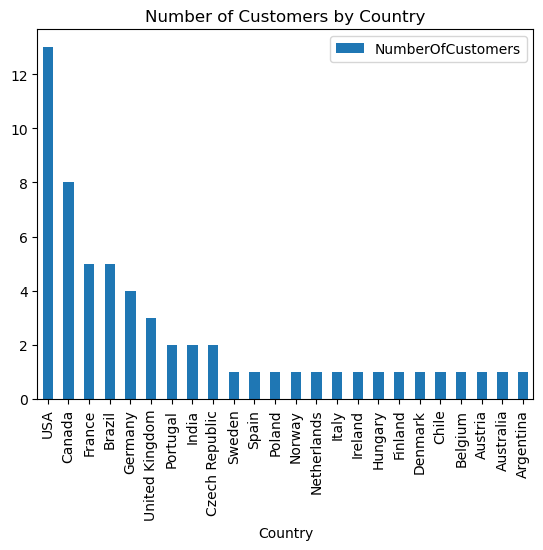

In [10]:

# SQL query to get number of customers in each country in descending order
customers_by_country = %sql SELECT Country, COUNT(*) AS NumberOfCustomers FROM customers GROUP BY Country ORDER BY NumberOfCustomers DESC

# Convert customers_by_country into Pandas data frame
customers_by_country_df = customers_by_country.DataFrame()

# Plot the number of customers by country
customers_by_country_df.plot(kind='bar', x='Country', y='NumberOfCustomers', title='Number of Customers by Country')
plt.show()


### Number of Tracks by Genre

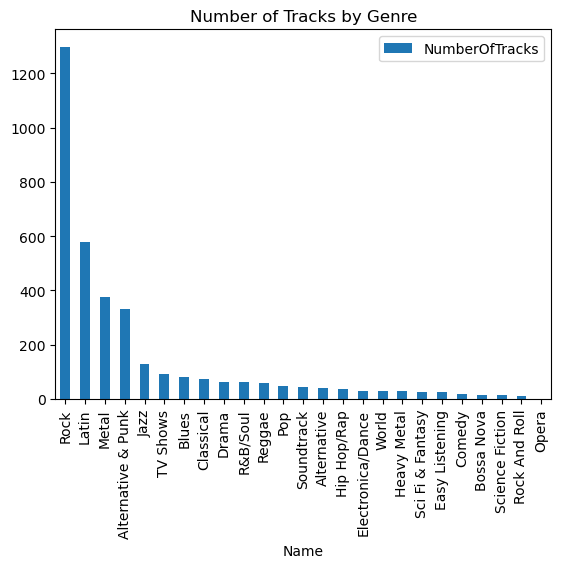

In [11]:
# Load number of tracks per genre directly into Pandas data frame
tracks_per_genre = pd.read_sql_query("SELECT genres.Name, COUNT(tracks.TrackId) AS NumberOfTracks FROM tracks JOIN genres ON genres.GenreId = tracks.GenreId GROUP BY genres.Name ORDER BY NumberOfTracks DESC", conn)

# Plot number of tracks by genre
tracks_per_genre.plot(kind='bar', x='Name', y='NumberOfTracks', title = 'Number of Tracks by Genre')
plt.show()

### Descriptive Statistics for Invoices

In [12]:
# Load invoice data directly into Pandas data frame
invoices = pd.read_sql_query("SELECT Total, CustomerId FROM invoices", conn)

# Calculate the mean, median, and standard deviation of the invoice totals
mean = np.mean(invoices['Total'])
median = np.median(invoices['Total'])
std_dv = np.std(invoices['Total'])
min = np.min(invoices['Total'])
max = np.max(invoices['Total'])

# Print the mean, median and standard deviation
print(f'Mean: {mean}\nMedian: {median}\nStandard Deviation: {std_dv}\nMinimum: {min}\nMaximum: {max}')

Mean: 5.651941747572814
Median: 3.96
Standard Deviation: 4.739557311729623
Minimum: 0.99
Maximum: 25.86
